# Kinetics analyser tutorial

This python program analyses chemical kinetics data from a csv file. It is design to determine the order of a given reaction with respect to a chemical species. It receives data from experiments in which different concentrations of a chemical species are mixed with a fixed concentration of another chemical species and time is recorded until the end of reaction. 

The csv file must follow the template below:

| conc. | conc. unc. | Exp. 1 time | Exp. 1 time unc. | Exp. 2 time | Exp. 2 time unc. | 
| --- | --- | --- | --- | ---  | --- |
| .   | .   | .   | .   | .    | .   | 
| .   | .   | .   | .   | .    | .   |

where "conc." is concentration, "unc." is uncertainty and "Exp." is experiment. It can have as much concentration rows and experiments columns as desired as long the template is followed.

Run the following cell to instantiate the module:

In [1]:
import kinetics_analyser as kinetics

# Example 01

In this example we are going to use a csv file with chemical kinetics data from a [iodine clock reaction experiment (hydrogen peroxide variation)](https://en.wikipedia.org/wiki/Iodine_clock_reaction). 

These data are from a lab experiment made with four groups of students. So, each column has the time measures from a given group.

First, let's show that the csv follows the required template:

In [2]:
!cat data/2016_2_h2o2.csv

Date:,2016-2,Local:,Nilopolis – RJ – Brazil,,,,,,
Experiment:,Iodine clock reaction - Hydrogen peroxide variation,,,,,,,,
Groups:,4,,,,,,,,
H2O2 unit:,% m/v,,,,,,,,
Time unit,seconds,,,,,,,,
,,,,,,,,,
[H2O2],[H2O2] unc,Group 1,Group 1 unc,Group 2,Group 2 unc,Group 3,Group 3 unc,Group 4,Group 4 unc
3,0,20,0,20.73,0,20.45,0,22,0
2.4,0,25,0,25.67,0,26.38,0,25,0
1.8,0,33,0,33.19,0,36.43,0,27,0
1.2,0,54,0,46.11,0,44,0,50,0
0.6,0,109,0,117.96,0,70.2,0,94,0


As can be seen, there is an uncertainty column for each group experiment and also for the $H_2O_2$ concentration column. The uncertainties columns are mandatory. If no uncertainties are available, fill the columns with 0 (zero).

There are six lines of comments above the data table that must be ignored by the program.

First, let's assign the path to the file to a variable:

In [3]:
file01 = 'data/2016_2_h2o2.csv'

Now, we can instantiate the class assigning to a variable and passing the file and how many lines must be ignored:

In [4]:
ex01 = kinetics.KineticsAnalyser(file01, 6)

The imported data can be visualized:

In [5]:
ex01.data_file

,[H2O2],[H2O2] unc,Group 1,Group 1 unc,Group 2,Group 2 unc,Group 3,Group 3 unc,Group 4,Group 4 unc
0,3.0,0,20,0,20.73,0,20.45,0,22,0
1,2.4,0,25,0,25.67,0,26.38,0,25,0
2,1.8,0,33,0,33.19,0,36.43,0,27,0
3,1.2,0,54,0,46.11,0,44.00,0,50,0
4,0.6,0,109,0,117.96,0,70.20,0,94,0


The module joins the nominal values and their respective uncertainties as can be seen:

In [6]:
ex01.data_unc

,concentration,ln(concentration),1/concentration,Experiment 1,Experiment 2,Experiment 3,Experiment 4,average,median
0,3.0+/-0,1.0986122886681098+/-0,0.3333333333333333+/-0,20.0+/-0,20.73+/-0,20.45+/-0,22.0+/-0,20.795+/-0,20.59+/-0
1,2.4+/-0,0.8754687373538999+/-0,0.4166666666666667+/-0,25.0+/-0,25.67+/-0,26.38+/-0,25.0+/-0,25.5125+/-0,25.335+/-0
2,1.8+/-0,0.5877866649021191+/-0,0.5555555555555556+/-0,33.0+/-0,33.19+/-0,36.43+/-0,27.0+/-0,32.405+/-0,33.095+/-0
3,1.2+/-0,0.1823215567939546+/-0,0.8333333333333334+/-0,54.0+/-0,46.11+/-0,44.0+/-0,50.0+/-0,48.5275+/-0,48.055+/-0
4,0.6+/-0,-0.5108256237659907+/-0,1.6666666666666667+/-0,109.0+/-0,117.96+/-0,70.2+/-0,94.0+/-0,97.78999999999999+/-0,101.5+/-0


We can see the number of concentration rows (dilutions):

In [7]:
ex01.dilutions

5

And the number of experiments:

In [8]:
ex01.experiments

4

Since this project is based on educational experiments where different groups of students do the same procedures, the educator can show the time measures dispersion for a class with the `time_dispersion` method. One must note that, in a real experiment for academic papers, the experiments must be perform in triplicate by the same team with the same method but this is not usually done in lab classes due to time restriction. So this method is useful only for educational purposes where the educator can make the students think about reasons for such differences between measures from each group.

In [9]:
ex01.time_dispersion()

0     0.857768
1     0.658958
2     3.932128
3     4.414336
4    20.881133
dtype: float64

The `summary` method calculates the order and rate constant for each experiment and also based on the average and the median of time measures.

In [10]:
ex01.summary()

,Experiment 1,Experiment 2,Experiment 3,Experiment 4,average,median
R2 zero order,0.809475,0.72671,0.910493,0.778737,0.798835,0.787984
R2 first order,0.951767,0.896157,0.988662,0.93263,0.945017,0.937871
R2 second order,0.999412,0.986313,0.973877,0.989791,0.999602,0.998648
Order,2,2,1,2,2,2
Rate constant,0.01486+/-0.00021,0.0135+/-0.0009,0.0326+/-0.0020,0.0178+/-0.0010,0.01726+/-0.00020,0.01643+/-0.00035


The plot method plots a concentration vs time graph by default. It can be customized with the chemical formula and some other paremeters:

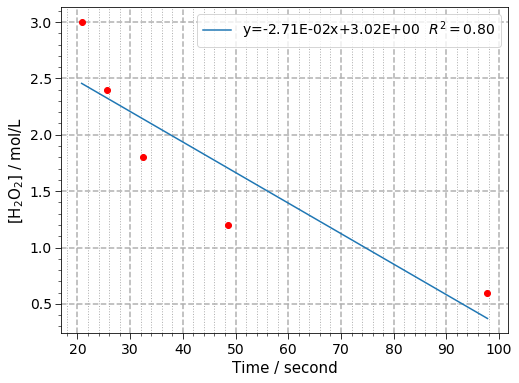

In [11]:
ex01.plot(formula='H2O2', plot_type='conc', linear_fit=True, column='average')

As expected, the linear fit is not so good since second order reactions gives a better fit in plots of inverse of the concentration vs time. 

But first, we can plot the natural logarithm of the concentratiton vs time with parameter `plot_type='ln_conc'`:

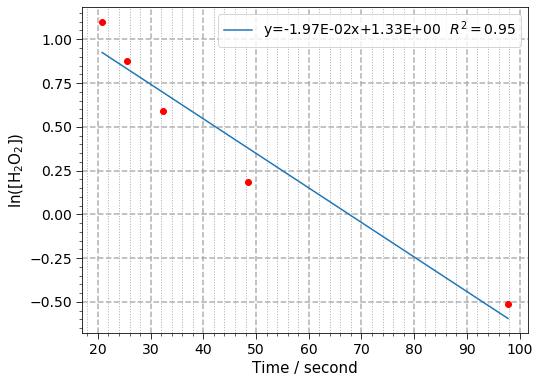

In [12]:
ex01.plot(formula='H2O2', plot_type='ln_conc', linear_fit=True, column='average')

For second order reactions, a plot of the inverse of the concentration vs time is a straight line. For this kind of plot we can pass `plot_type='inv_conc'`:

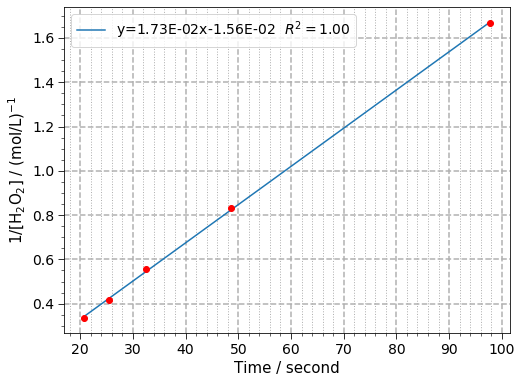

In [13]:
ex01.plot(formula='H2O2', plot_type='inv_conc', linear_fit=True, column='average')

With `matplotlib` and a `for` loop one can see all the plots for each experiment:

In [14]:
import matplotlib.pyplot as plt

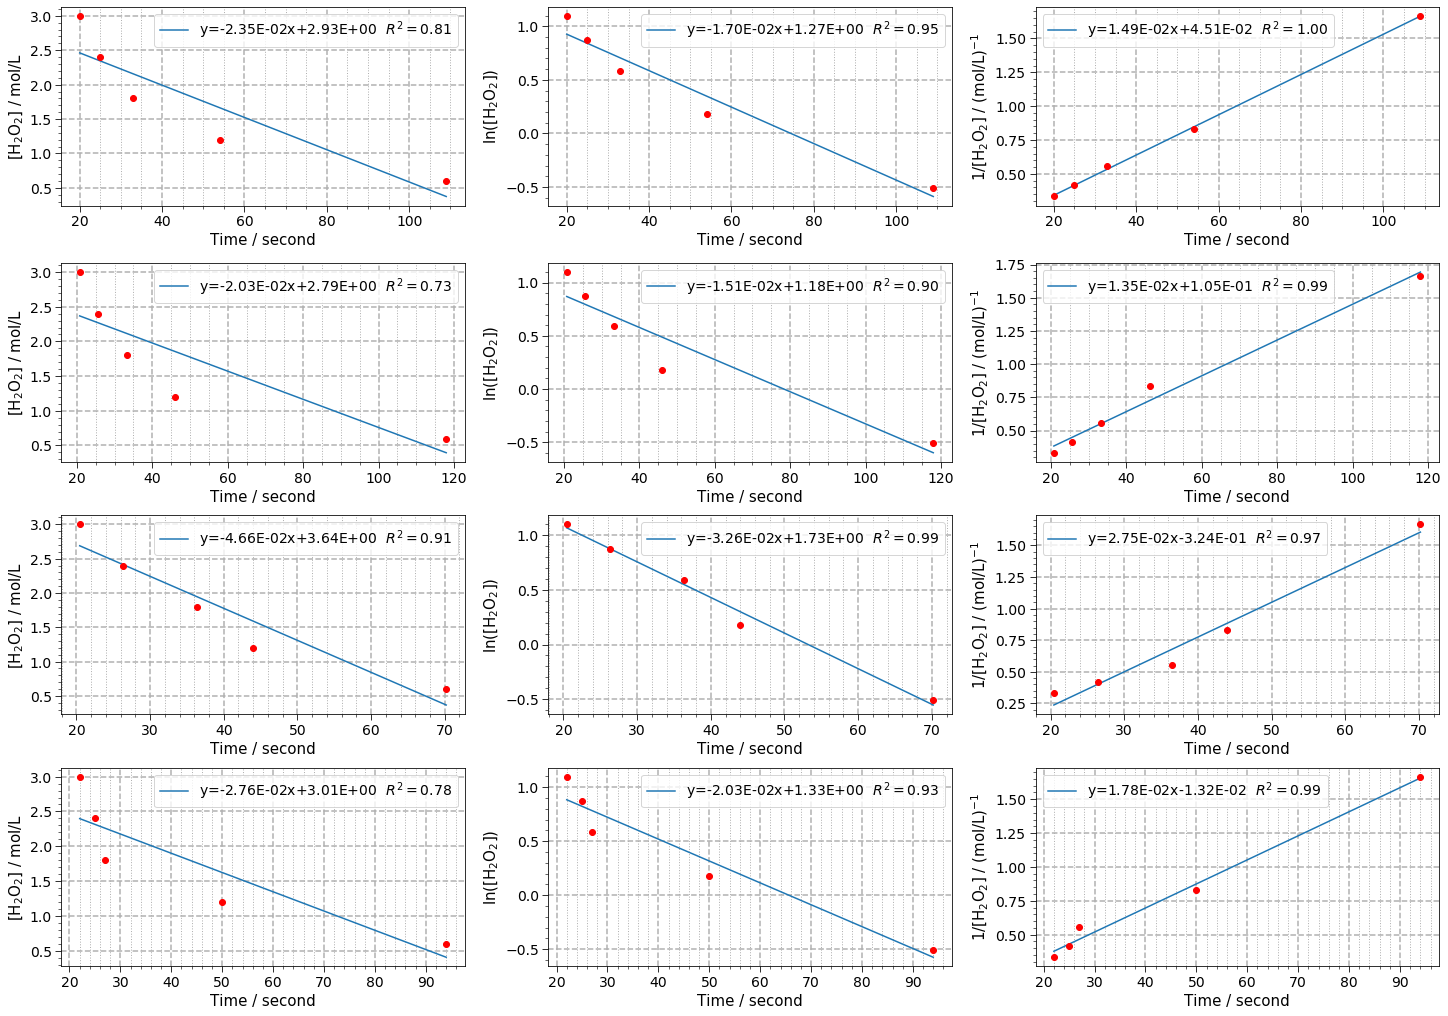

In [15]:
fig01, axarr = plt.subplots(nrows = 4, ncols = 3, figsize=(20,14), constrained_layout=True, facecolor=(1.0, 1.0, 1.0))

for i in range(1, 5):
    column_name = 'Experiment ' + str(i)
    ex01.plot(ax=axarr[i-1, 0], linear_fit=True, plot_type='conc', formula='H2O2', column=column_name)
    ex01.plot(ax=axarr[i-1, 1], linear_fit=True, plot_type='ln_conc', formula='H2O2', column=column_name)
    ex01.plot(ax=axarr[i-1, 2], linear_fit=True, plot_type='inv_conc', formula='H2O2', column=column_name)

The same for the average and median values:

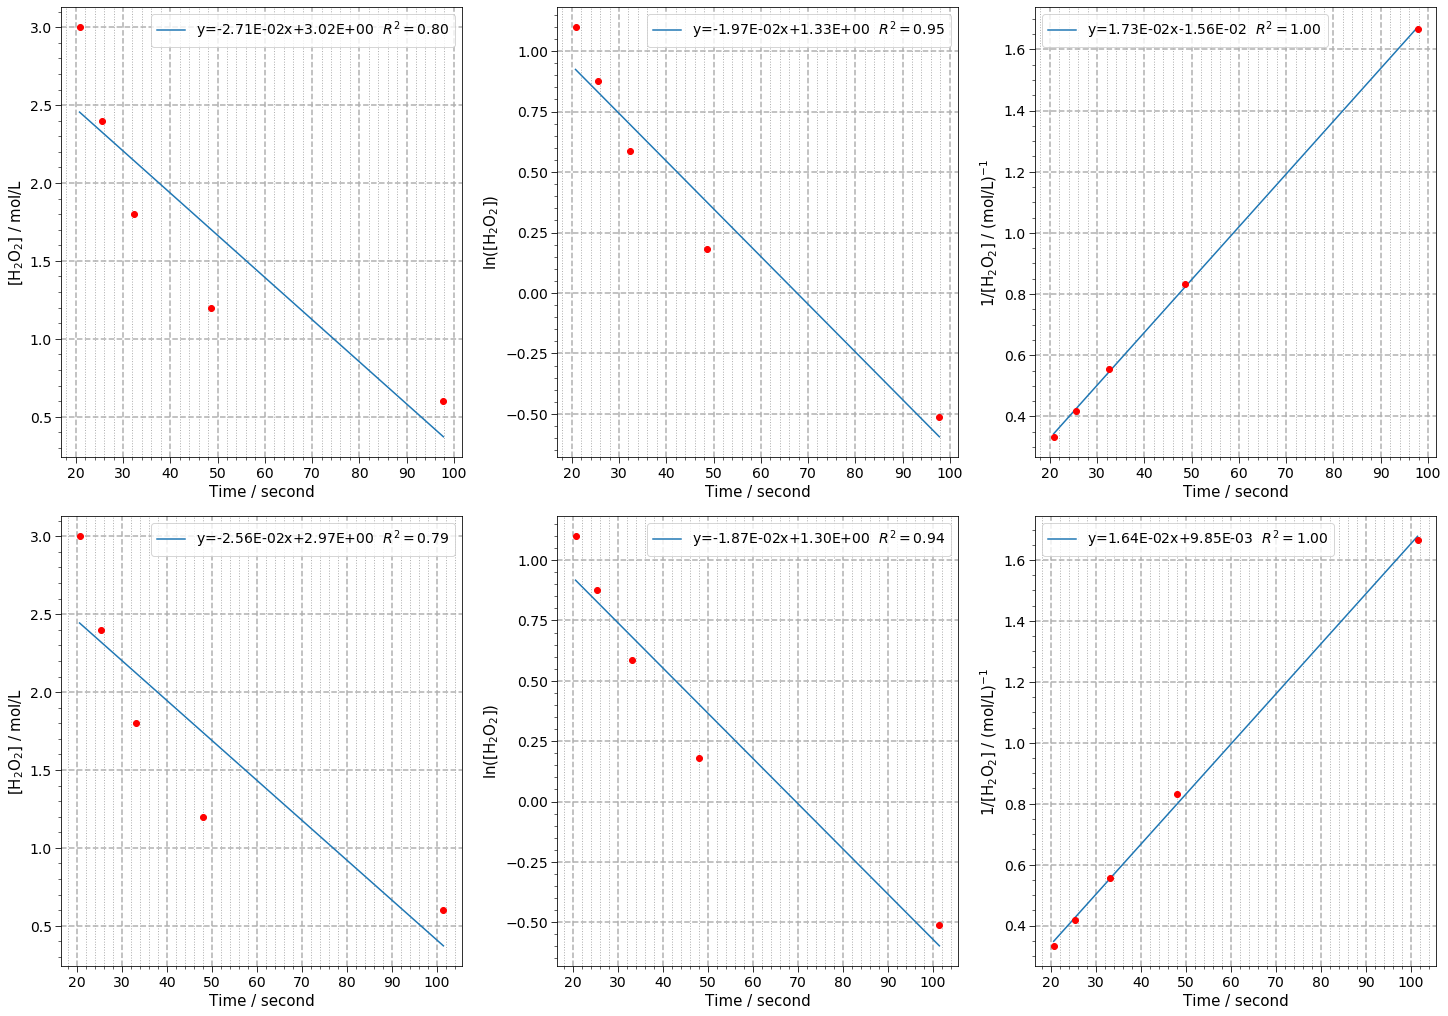

In [16]:
fig02, axarr = plt.subplots(nrows = 2, ncols = 3, figsize=(20,14), constrained_layout=True, facecolor=(1.0, 1.0, 1.0))

ex01.plot(ax=axarr[0, 0], linear_fit=True, plot_type='conc', formula='H2O2', column='average')
ex01.plot(ax=axarr[0, 1], linear_fit=True, plot_type='ln_conc', formula='H2O2', column='average')
ex01.plot(ax=axarr[0, 2], linear_fit=True, plot_type='inv_conc', formula='H2O2', column='average')

ex01.plot(ax=axarr[1, 0], linear_fit=True, plot_type='conc', formula='H2O2', column='median')
ex01.plot(ax=axarr[1, 1], linear_fit=True, plot_type='ln_conc', formula='H2O2', column='median')
ex01.plot(ax=axarr[1, 2], linear_fit=True, plot_type='inv_conc', formula='H2O2', column='median')

# Example 02

Now, let's use the same data from the first example but with uncertainties.

In [17]:
!cat data/2016_2_h2o2_unc.csv

Date:,2016-2,Local:,Nilopolis – RJ – Brazil,,,,,,
Experiment:,Iodine clock reaction - Hydrogen peroxide variation,,,,,,,,
Groups:,4,,,,,,,,
H2O2 unit:,% m/v,,,,,,,,
Time unit,seconds,,,,,,,,
,,,,,,,,,
[H2O2],[H2O2] unc,Group 1,Group 1 unc,Group 2,Group 2 unc,Group 3,Group 3 unc,Group 4,Group 4 unc
3,0.01,20,0.5,20.73,0.005,20.45,0.005,22,0.5
2.4,0.02,25,0.5,25.67,0.005,26.38,0.005,25,0.5
1.8,0.02,33,0.5,33.19,0.005,36.43,0.005,27,0.5
1.2,0.02,54,0.5,46.11,0.005,44,0.005,50,0.5
0.6,0.02,109,0.5,117.96,0.005,70.2,0.005,94,0.5


In [18]:
file02 = 'data/2016_2_h2o2_unc.csv'

In [19]:
ex02 = kinetics.KineticsAnalyser(file02, 6)

In [20]:
ex02.data_file

,[H2O2],[H2O2] unc,Group 1,Group 1 unc,Group 2,Group 2 unc,Group 3,Group 3 unc,Group 4,Group 4 unc
0,3.0,0.01,20,0.5,20.73,0.005,20.45,0.005,22,0.5
1,2.4,0.02,25,0.5,25.67,0.005,26.38,0.005,25,0.5
2,1.8,0.02,33,0.5,33.19,0.005,36.43,0.005,27,0.5
3,1.2,0.02,54,0.5,46.11,0.005,44.00,0.005,50,0.5
4,0.6,0.02,109,0.5,117.96,0.005,70.20,0.005,94,0.5


In [21]:
ex02.data_unc

,concentration,ln(concentration),1/concentration,Experiment 1,Experiment 2,Experiment 3,Experiment 4,average,median
0,3.000+/-0.010,1.0986+/-0.0033,0.3333+/-0.0011,20.0+/-0.5,20.730+/-0.005,20.450+/-0.005,22.0+/-0.5,20.80+/-0.18,20.5900+/-0.0035
1,2.400+/-0.020,0.875+/-0.008,0.4167+/-0.0035,25.0+/-0.5,25.670+/-0.005,26.380+/-0.005,25.0+/-0.5,25.51+/-0.18,25.34+/-0.25
2,1.800+/-0.020,0.588+/-0.011,0.556+/-0.006,33.0+/-0.5,33.190+/-0.005,36.430+/-0.005,27.0+/-0.5,32.41+/-0.18,33.09+/-0.25
3,1.200+/-0.020,0.182+/-0.017,0.833+/-0.014,54.0+/-0.5,46.110+/-0.005,44.000+/-0.005,50.0+/-0.5,48.53+/-0.18,48.05+/-0.25
4,0.600+/-0.020,-0.511+/-0.033,1.67+/-0.06,109.0+/-0.5,117.960+/-0.005,70.200+/-0.005,94.0+/-0.5,97.79+/-0.18,101.50+/-0.35


In [22]:
ex02.summary()

,Experiment 1,Experiment 2,Experiment 3,Experiment 4,average,median
R2 zero order,0.915224,0.694776,0.899273,0.927407,0.813542,0.809697
R2 first order,0.934837,0.682337,0.985277,0.940283,0.856868,0.834798
R2 second order,0.999703,0.913015,0.816208,0.996732,0.997101,0.993656
Order,2,2,1,2,2,2
Rate constant,0.0150+/-0.0006,0.0171+/-0.0013,0.0345+/-0.0020,0.0187+/-0.0029,0.0181+/-0.0004,0.0176+/-0.0004


Now the rate constants have uncertainties calculate by [propagation](https://en.wikipedia.org/wiki/Propagation_of_uncertainty).

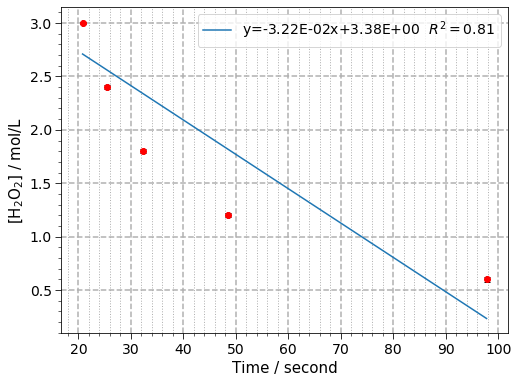

In [23]:
ex02.plot(formula='H2O2', plot_type='conc', linear_fit=True, column='average')

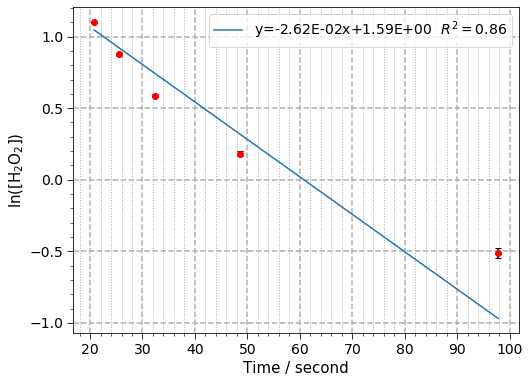

In [24]:
ex02.plot(formula='H2O2', plot_type='ln_conc', linear_fit=True, column='average')

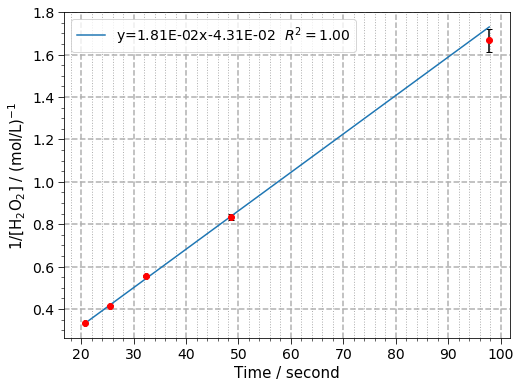

In [25]:
ex02.plot(formula='H2O2', plot_type='inv_conc', linear_fit=True, column='average')

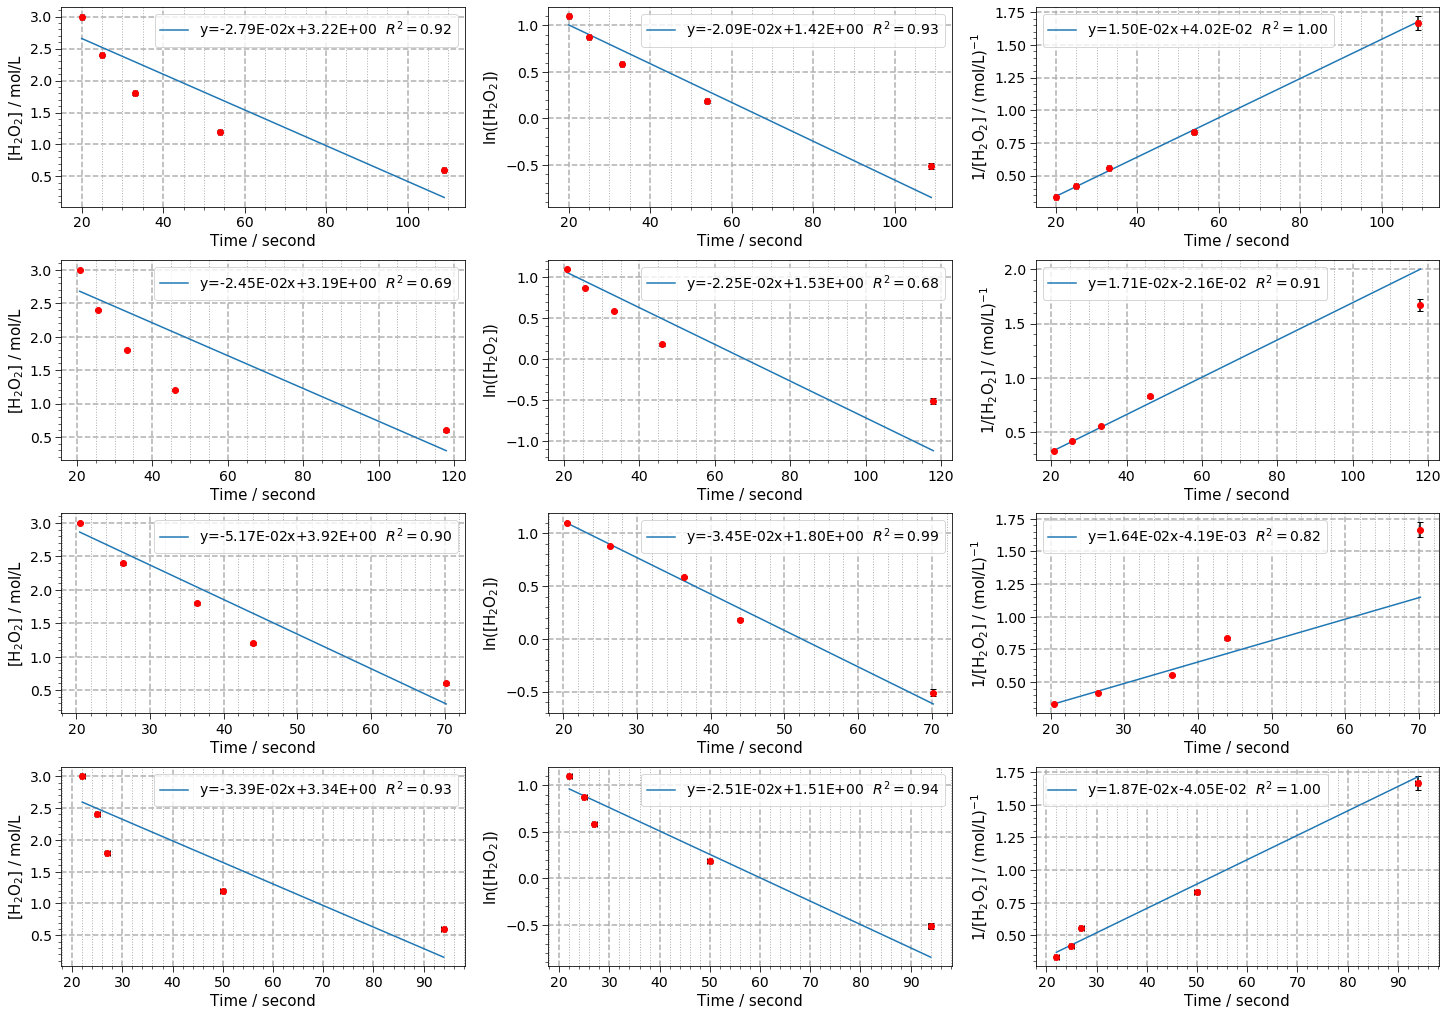

In [26]:
fig03, axarr = plt.subplots(nrows = 4, ncols = 3, figsize=(20,14), constrained_layout=True, facecolor=(1.0, 1.0, 1.0))

for i in range(1, 5):
    column_name = 'Experiment ' + str(i)
    ex02.plot(ax=axarr[i-1, 0], linear_fit=True, plot_type='conc', formula='H2O2', column=column_name)
    ex02.plot(ax=axarr[i-1, 1], linear_fit=True, plot_type='ln_conc', formula='H2O2', column=column_name)
    ex02.plot(ax=axarr[i-1, 2], linear_fit=True, plot_type='inv_conc', formula='H2O2', column=column_name)

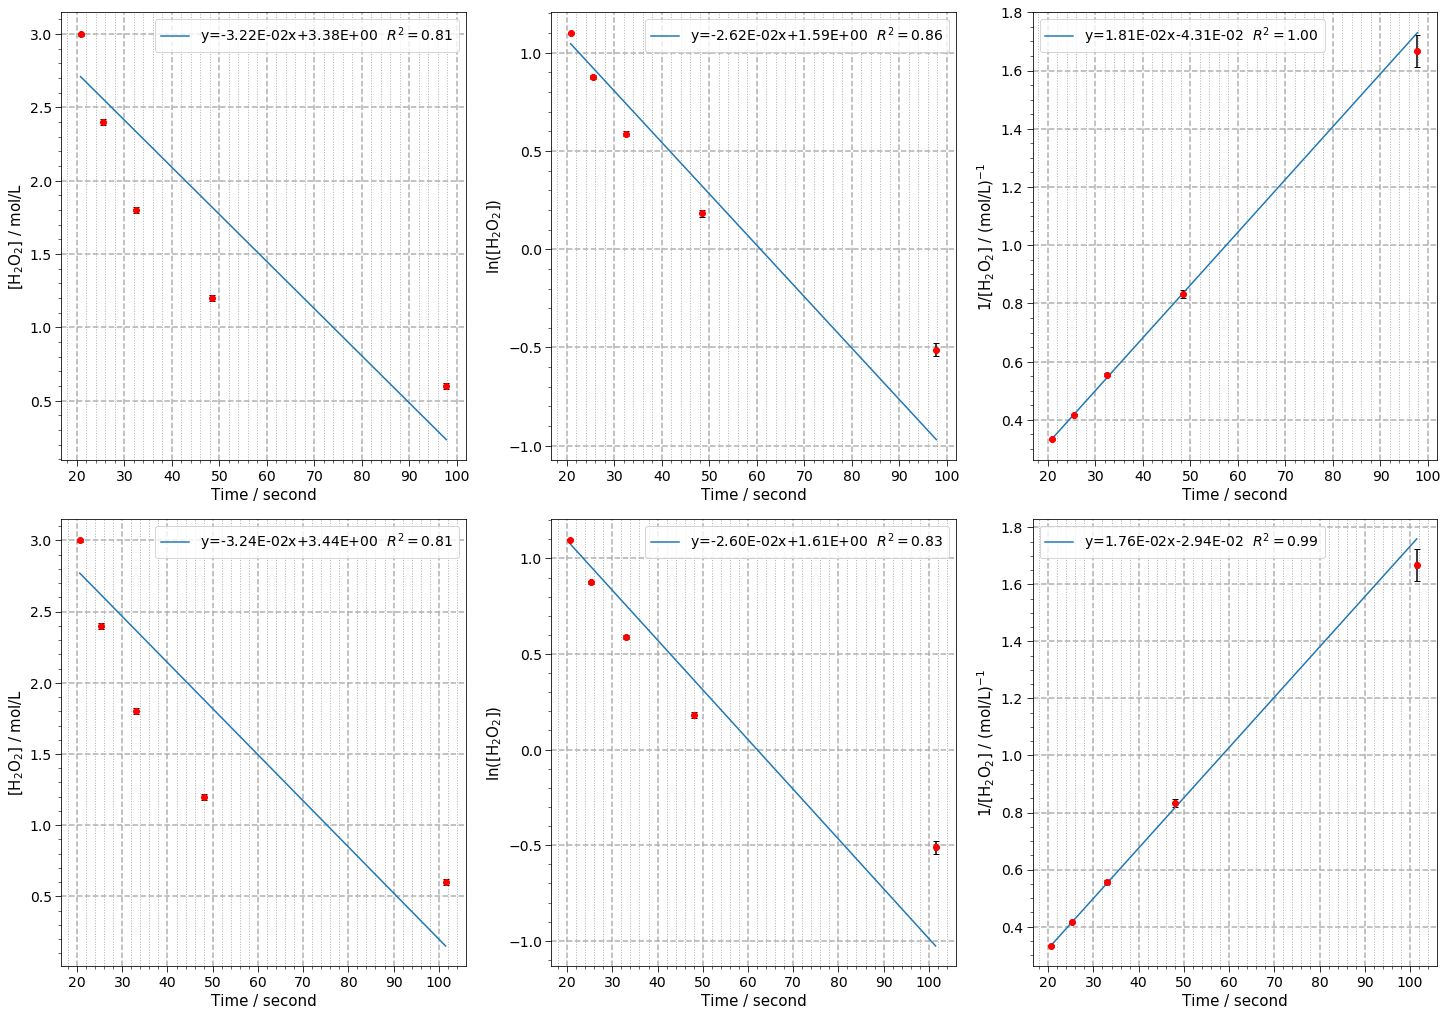

In [27]:
fig04, axarr = plt.subplots(nrows = 2, ncols = 3, figsize=(20,14), constrained_layout=True, facecolor=(1.0, 1.0, 1.0))

ex02.plot(ax=axarr[0, 0], linear_fit=True, plot_type='conc', formula='H2O2', column='average')
ex02.plot(ax=axarr[0, 1], linear_fit=True, plot_type='ln_conc', formula='H2O2', column='average')
ex02.plot(ax=axarr[0, 2], linear_fit=True, plot_type='inv_conc', formula='H2O2', column='average')

ex02.plot(ax=axarr[1, 0], linear_fit=True, plot_type='conc', formula='H2O2', column='median')
ex02.plot(ax=axarr[1, 1], linear_fit=True, plot_type='ln_conc', formula='H2O2', column='median')
ex02.plot(ax=axarr[1, 2], linear_fit=True, plot_type='inv_conc', formula='H2O2', column='median')

Due to uncertainties, plots now show error bars.

## Regression type

The module uses the input data and calculates the error propagation. The linear fit is done with ODR ([orthogonal distance regression](https://en.wikipedia.org/wiki/Deming_regression#Orthogonal_regression)) since both variables (concentration and time) have uncertainties. For educational purposes, one can ignore uncertainties and uses an ordinary least square (OLS) linear fit to show to students the effects of uncertainties. 

The `summary` method has a `reg_type` parameter that can set to `ols`

In [28]:
ex02.summary()  # default odr linear fit

,Experiment 1,Experiment 2,Experiment 3,Experiment 4,average,median
R2 zero order,0.915224,0.694776,0.899273,0.927407,0.813542,0.809697
R2 first order,0.934837,0.682337,0.985277,0.940283,0.856868,0.834798
R2 second order,0.999703,0.913015,0.816208,0.996732,0.997101,0.993656
Order,2,2,1,2,2,2
Rate constant,0.0150+/-0.0006,0.0171+/-0.0013,0.0345+/-0.0020,0.0187+/-0.0029,0.0181+/-0.0004,0.0176+/-0.0004


In [29]:
ex02.summary(reg_type='ols')

,Experiment 1,Experiment 2,Experiment 3,Experiment 4,average,median
R2 zero order,0.809266,0.726485,0.910104,0.778399,0.79854,0.787706
R2 first order,0.951739,0.896109,0.988638,0.932575,0.944974,0.937828
R2 second order,0.999411,0.986308,0.973837,0.989784,0.999602,0.998648
Order,2,2,1,2,2,2
Rate constant,0.01486+/-0.00021,0.0135+/-0.0009,0.0326+/-0.0020,0.0178+/-0.0010,0.01726+/-0.00020,0.01643+/-0.00035


The plot method has a `linear_fit_ols` that can be set to `True` (works only when the default odr `linear_fit` is also set to `True`). So that both straight lines, ODR and OLS, are plotted.

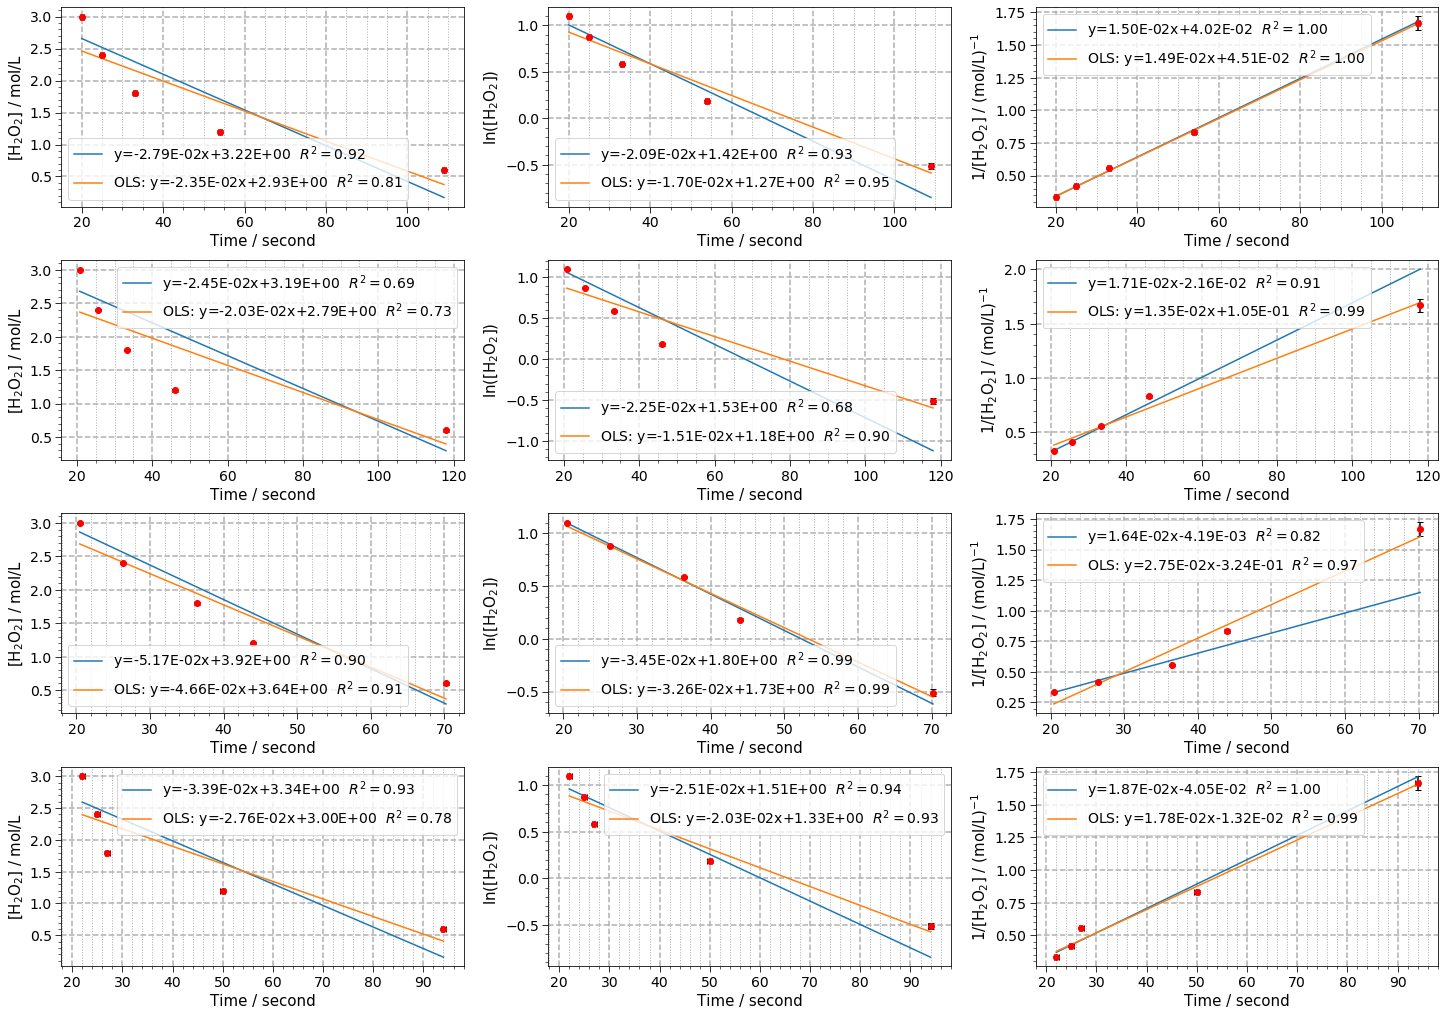

In [30]:
fig05, axarr = plt.subplots(nrows = 4, ncols = 3, figsize=(20,14), constrained_layout=True, facecolor=(1.0, 1.0, 1.0))

for i in range(1, 5):
    column_name = 'Experiment ' + str(i)
    ex02.plot(ax=axarr[i-1, 0], linear_fit=True, plot_type='conc', formula='H2O2', column=column_name, linear_fit_ols=True)
    ex02.plot(ax=axarr[i-1, 1], linear_fit=True, plot_type='ln_conc', formula='H2O2', column=column_name, linear_fit_ols=True)
    ex02.plot(ax=axarr[i-1, 2], linear_fit=True, plot_type='inv_conc', formula='H2O2', column=column_name, linear_fit_ols=True)

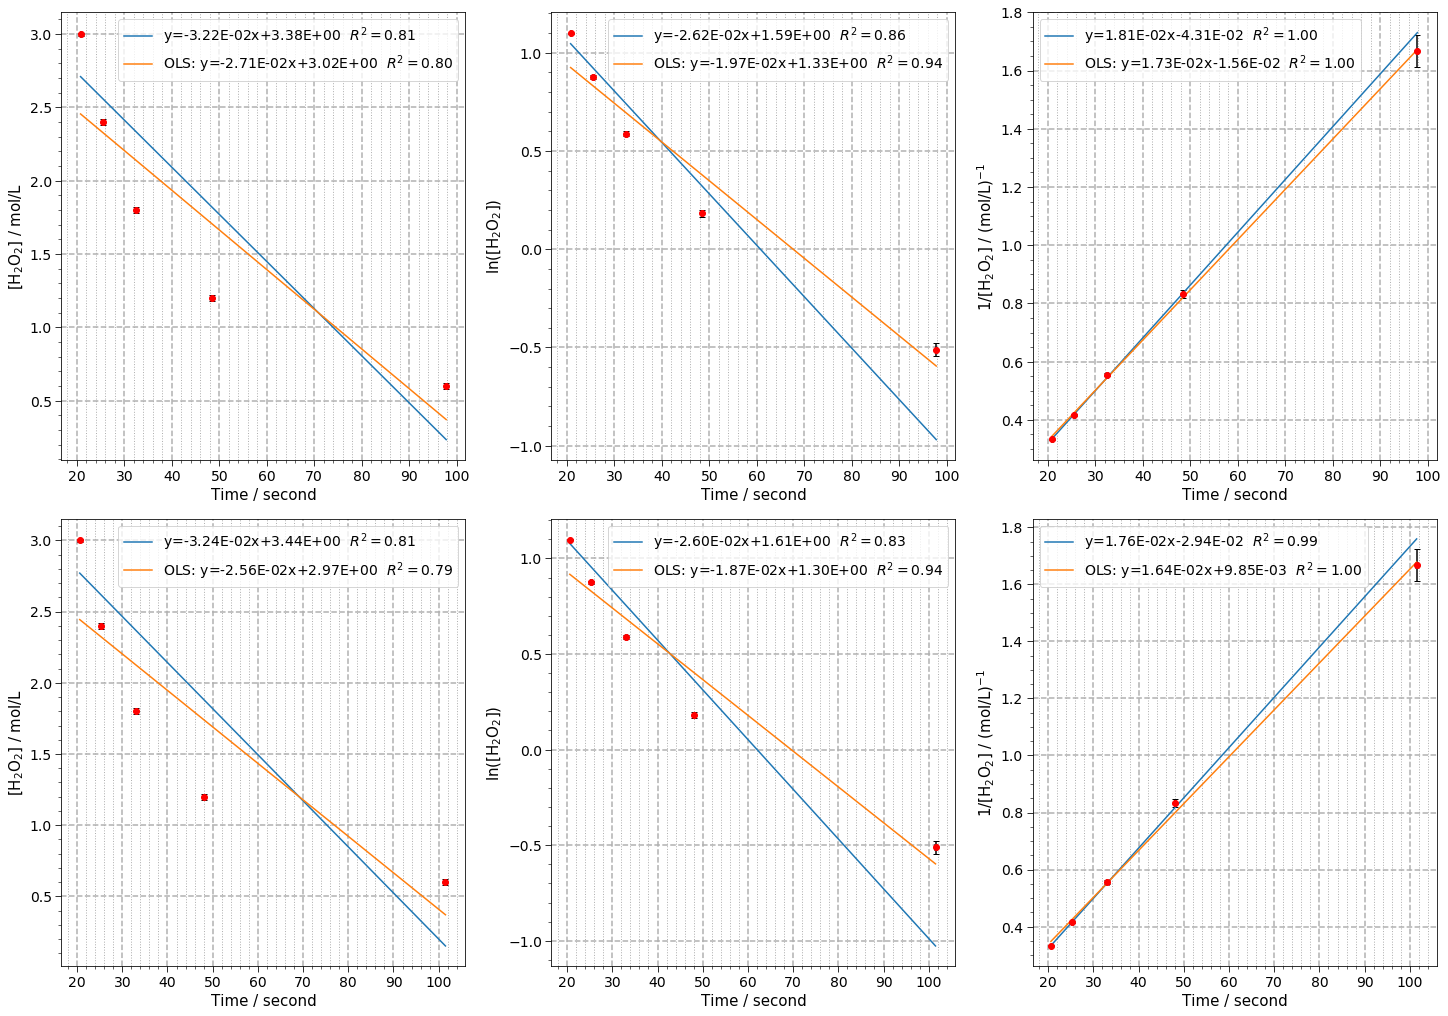

In [31]:
fig06, axarr = plt.subplots(nrows = 2, ncols = 3, figsize=(20,14), constrained_layout=True, facecolor=(1.0, 1.0, 1.0))

ex02.plot(ax=axarr[0, 0], linear_fit=True, plot_type='conc', formula='H2O2', column='average', linear_fit_ols=True)
ex02.plot(ax=axarr[0, 1], linear_fit=True, plot_type='ln_conc', formula='H2O2', column='average', linear_fit_ols=True)
ex02.plot(ax=axarr[0, 2], linear_fit=True, plot_type='inv_conc', formula='H2O2', column='average', linear_fit_ols=True)

ex02.plot(ax=axarr[1, 0], linear_fit=True, plot_type='conc', formula='H2O2', column='median', linear_fit_ols=True)
ex02.plot(ax=axarr[1, 1], linear_fit=True, plot_type='ln_conc', formula='H2O2', column='median', linear_fit_ols=True)
ex02.plot(ax=axarr[1, 2], linear_fit=True, plot_type='inv_conc', formula='H2O2', column='median', linear_fit_ols=True)

# Version information

In [32]:
%load_ext version_information
%version_information pandas, numpy, matplotlib, scipy, uncertainties

Software versions
Python 3.6.10 64bit [GCC 7.3.0]
IPython 7.12.0
OS Linux 5.3.0 40 generic x86_64 with debian buster sid
pandas 1.0.1
numpy 1.18.1
matplotlib 3.1.3
scipy 1.4.1
uncertainties 3.1.2
Tue Mar 10 11:12:09 2020 -03